In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation

In [5]:
# Reads train & test features and labels data from files and returnes them as numpy arrays
X_train_df = pd.read_csv('X_train_header.txt')
y_train_df = pd.read_csv('y_train_header.txt')
X_test_df = pd.read_csv('X_test_header.txt')
y_test_df = pd.read_csv('y_test_header.txt');

n_train_samples = X_train_df.shape[0]
n_test_samples = X_test_df.shape[0]
n_features = X_train_df.shape[1]

X_train = np.array(X_train_df).reshape((n_train_samples,n_features))
y_train = np.array(y_train_df).reshape(n_train_samples,)    
X_test = np.array(X_test_df).reshape((n_test_samples,n_features))
y_test = np.array(y_test_df).reshape(n_test_samples,)

5 [0.85782151340346113]
10 [0.85782151340346113, 0.88123515439429934]
15 [0.85782151340346113, 0.88123515439429934, 0.89718357651849323]
20 [0.85782151340346113, 0.88123515439429934, 0.89718357651849323, 0.90227349847302352]
25 [0.85782151340346113, 0.88123515439429934, 0.89718357651849323, 0.90227349847302352, 0.90736342042755358]
30 [0.85782151340346113, 0.88123515439429934, 0.89718357651849323, 0.90227349847302352, 0.90736342042755358, 0.91143535799117747]
35 [0.85782151340346113, 0.88123515439429934, 0.89718357651849323, 0.90227349847302352, 0.90736342042755358, 0.91143535799117747, 0.91177468612147938]
40 [0.85782151340346113, 0.88123515439429934, 0.89718357651849323, 0.90227349847302352, 0.90736342042755358, 0.91143535799117747, 0.91177468612147938, 0.91822192059721741]
45 [0.85782151340346113, 0.88123515439429934, 0.89718357651849323, 0.90227349847302352, 0.90736342042755358, 0.91143535799117747, 0.91177468612147938, 0.91822192059721741, 0.92195453003053951]


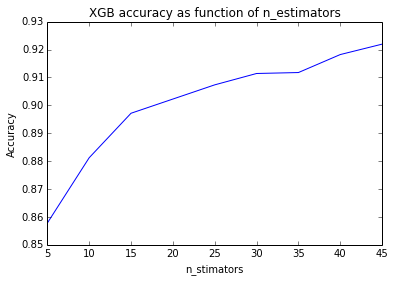

In [8]:
# 1. XGB Accuracy as function of number of trees parameter
num_trees = range(5, 55, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in xrange(5):
        xgbc = xgb.XGBClassifier(n_estimators=n)  
        xgbc.fit(X_train, y_train-1)
        tot += xgbc.score (X_test, y_test-1)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(num_trees, accuracies)
plt.xlabel('n_stimators')
plt.ylabel('Accuracy')
plt.title('XGB accuracy as function of n_estimators') 
plt.show()

0.0 [0.18221920597217509]
0.1 [0.18221920597217509, 0.18221920597217509]
0.2 [0.18221920597217509, 0.18221920597217509, 0.18221920597217509]
0.3 [0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509]
0.4 [0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509]
0.5 [0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509]
0.6 [0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509]
0.7 [0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509]
0.8 [0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509, 0.18221920597217509]
0.9 [0.182

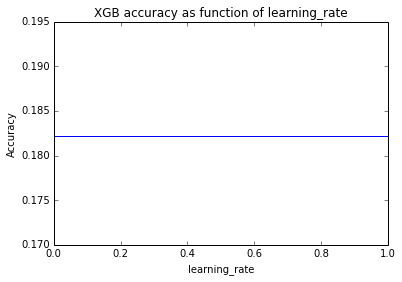

In [15]:
# 2. XGB Accuracy as function of learning rate parameter
learning_rate = np.arange(0, 1.1, 0.1)
accuracies = []
for n in learning_rate:
    tot = 0
    for i in xrange(5):
        xgbc = xgb.XGBClassifier(learning_rate=n)
        xgbc.fit(X_train, y_train-1)
        tot += xgbc.score(X_test, y_test-1)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(learning_rate, accuracies)
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('XGB accuracy as function of learning_rate') 
plt.show() 

2 [0.9236511706820496]
4 [0.9236511706820496, 0.9334916864608076]
6 [0.9236511706820496, 0.9334916864608076, 0.92704445198506957]
8 [0.9236511706820496, 0.9334916864608076, 0.92704445198506957, 0.92297251442144557]
10 [0.9236511706820496, 0.9334916864608076, 0.92704445198506957, 0.92297251442144557, 0.92195453003053951]


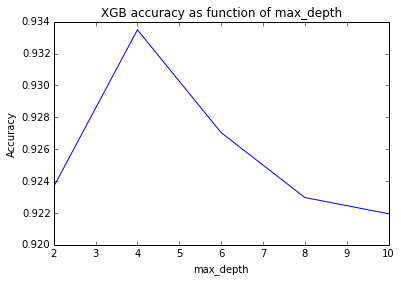

In [16]:
# 3. XGB Accuracy as function of max_depth parameter
max_depth = range(2, 11, 2)
accuracies = []
for n in max_depth:
    tot = 0
    for i in xrange(5):
        xgbc = xgb.XGBClassifier(max_depth=n)
        xgbc.fit(X_train, y_train-1)
        tot += xgbc.score(X_test, y_test-1)
    accuracies.append(tot / 5)
    print n, accuracies
plt.plot(max_depth, accuracies)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('XGB accuracy as function of max_depth') 
plt.show() 